# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

---
freeze: true              
format:
  html:
    embed-resources: true
---


In [1]:
!pip install palmerpenguins


In [20]:
import pandas as pd
from palmerpenguins import load_penguins


penguins = load_penguins()

# print some first three rows of the dataset to identify categorica; variables.
penguins.head(3)


# Answer:

# The variables need to dummified are species, island, and sex.



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [52]:
# Simple linear regression (e.g. straight-line) model
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
# Simple linear regression (e.g. straight-line) model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.model_selection import train_test_split

penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

X= penguins[["bill_length_mm"]]
y= penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

3.629022949289319

In [39]:
# Quadratic (degree 2 polynomial) model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)

y_pred_poly = lr2.predict(X_test_poly)


mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_poly


3.6170829824469006

In [41]:
# Cubic (degree 3 polynomial) model

poly3 = PolynomialFeatures(degree=3, include_bias=False)

X_train_p3 = poly3.fit_transform(X_train)
X_test_p3  = poly3.transform(X_test)

lr3 = LinearRegression()
lr3.fit(X_train_p3, y_train)


y_pred_p3 = lr3.predict(X_test_p3)
mse_p3 = mean_squared_error(y_test, y_pred_p3)
mse_p3

5.978274163129951

In [45]:
# Degree 10 polynomial model
poly10 = PolynomialFeatures(degree=10, include_bias=False)

X_train_p10 = poly10.fit_transform(X_train)
X_test_p10  = poly10.transform(X_test)


lr10 = LinearRegression()
lr10.fit(X_train_p10, y_train)


y_pred_p10 = lr10.predict(X_test_p10)


mse_p10 = mean_squared_error(y_test, y_pred_p10)
mse_p10

10.44379414182182

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


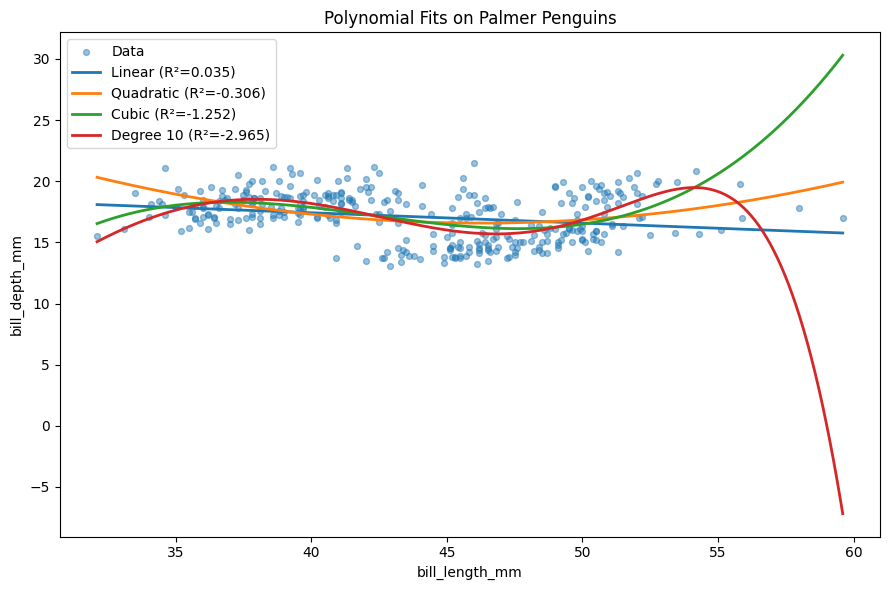

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x_grid = np.linspace(X.min().item(), X.max().item(), 400).reshape(-1, 1)

# Predictions on the grid for each model
y_lin  = lr.predict(x_grid)
y_q    = lr2.predict(poly.transform(x_grid))
y_c    = lr3.predict(poly3.transform(x_grid))
y_d10  = lr10.predict(poly10.transform(x_grid))

# R^2 on the TEST set (so legend reflects generalization)
r2_lin = r2_score(y_test, y_pred)
r2_q   = r2_score(y_test, y_pred_poly)
r2_c   = r2_score(y_test, y_pred_p3)
r2_d10 = r2_score(y_test, y_pred_p10)

plt.figure(figsize=(9,6))


plt.scatter(X, y, s=18, alpha=0.45, label="Data")


plt.plot(x_grid, y_lin,  lw=2, label=f"Linear (R²={r2_lin:.3f})")
plt.plot(x_grid, y_q,    lw=2, label=f"Quadratic (R²={r2_q:.3f})")
plt.plot(x_grid, y_c,    lw=2, label=f"Cubic (R²={r2_c:.3f})")
plt.plot(x_grid, y_d10,  lw=2, label=f"Degree 10 (R²={r2_d10:.3f})")

plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Polynomial Fits on Palmer Penguins")
plt.legend()
plt.tight_layout()
plt.show()


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Answer:

Based on the plot, there is no of the models above underfitting the data while the polynomial models are overfitting;especially the degree(10) model.

In addtion, the linear model fits best among the four because it has the highest test R².